# Dress Pattern Recognition

### Dataset:



   <h5>Dataset contains 15500 images having 16 different categories.</h5>
   <h5>Also has CSV file contains images url and there respective pattern category</h5>

In [1]:
#import all required libraries and packages

import os
import numpy as np
import pandas as pd
import urllib
from csv import reader
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
#for tensorflow 2.0 import statements syntax also updated
from keras import backend as K
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from keras import optimizers
from keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [2]:
#CSV file with URL
csv_filename = 'dress_patterns.csv' 
#Downloaded images will be saved at destination folder
dst_dir = 'dataset' 

def getImages(csv_file,loc):
    img_counts = 0
    fail_counts = 0
    with tqdm(open(csv_file, 'r')) as csv_file:
        for line in reader(csv_file):
            # line[1] is dedicated dir name
            # line[0] is id as name 
            url = line[3]
            name = url.rsplit('/')[-1].split('.')[0] +'.png'
            filename = loc + name
            
            try :
                urllib.request.urlretrieve(url, filename)
                img_counts += 1
            except  Exception as e:
                fail_counts += 1
                print(str(e))
    print('\n Done')
    print(f"Images downloaded : {img_counts}")
    print(f"Images failed to download {fail_counts}")
                         
#getImages(csv_filename,dst_dir)


# Preparing data

In [3]:
#generate data for feeding alalgorithm
IMG_WIDTH = 50
IMG_HEIGHT = 75
IMG_CHENNEL = 1
IMG_DIR = 'dataset'

#function to create data for traing purpose
#convert images into grayscale images
#resize images
#normalise images
#check images channels

def makeImageData(file,img_data_dir,IMG_WIDTH = 50,IMG_HEIGHT = 50,IMG_CHENNEL = 1):
    df = pd.read_csv(file)
    train_image = []
    for i in tqdm(range(0,df.shape[0])):
        url = df['image_url'][i]
        name = url.rsplit('/')[-1].split('.')[0]
        img_path = img_data_dir +'/'+name
        img = image.load_img(img_path+'.png', target_size=(IMG_WIDTH,IMG_HEIGHT,IMG_CHENNEL),color_mode = "grayscale")
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    X = np.array(train_image)
    np.save('X_images.npy',X)
    return X

# X contains final data i.e preprocessed 
X = makeImageData(csv_filename,IMG_DIR,IMG_WIDTH,IMG_HEIGHT,IMG_CHENNEL)



100%|████████████████████████████████████████████████████████████████████████████| 15702/15702 [06:00<00:00, 43.58it/s]


In [12]:
def createLabelList(file,label_col):
    catDict = {}
    y =[]
    df = pd.read_csv(file)
    y_temp = df[label_col].unique()
    for i,cat in enumerate(y_temp):
        catDict[cat] = i
    temp = df[label_col].values
    for name in temp:
        y.append(catDict[name])
    y = to_categorical(y)
    np.save('y_labels.npy',y)

    return y,catDict

y,category_dict = createLabelList(csv_filename,'category')


In [13]:
def splitdataset(X,y,split_size =0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=split_size)
    return  X_train, X_test, y_train, y_test
#ratio in which data devides
split_size =0.3
#train and test data
X_train, X_test, y_train, y_test = splitdataset(X,y,split_size)
#train and validation data.
X_train, X_val, y_train, y_val = splitdataset(X_train,y_train ,split_size)


# Creating Model

In [14]:
#build model
def buildModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', 
                    input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHENNEL)))
    model.add(MaxPooling2D((2, 2), name='maxpool_1'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
    model.add(MaxPooling2D((2, 2), name='maxpool_2'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
    model.add(MaxPooling2D((2, 2), name='maxpool_3'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='conv_4'))
    model.add(MaxPooling2D((2, 2), name='maxpool_4'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', name='dense_2'))
    model.add(Dense(17, activation='softmax', name='output'))

    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model

model = buildModel()

In [17]:
#  training the model
model.fit(X_train, y_train, epochs=50,validation_data=(X_val, y_val))


Train on 7693 samples, validate on 3298 samples
Epoch 1/50
7693/7693 [==============================] - 41s 5ms/sample - loss: 1.7300 - acc: 0.5301 - val_loss: 1.6275 - val_acc: 0.5464
Epoch 2/50
7693/7693 [==============================] - 53s 7ms/sample - loss: 1.6026 - acc: 0.5579 - val_loss: 1.5720 - val_acc: 0.5637
Epoch 3/50
7693/7693 [==============================] - 55s 7ms/sample - loss: 1.5504 - acc: 0.5807 - val_loss: 1.5327 - val_acc: 0.5955
Epoch 4/50
7693/7693 [==============================] - 55s 7ms/sample - loss: 1.5104 - acc: 0.5931 - val_loss: 1.5220 - val_acc: 0.5876
Epoch 5/50
7693/7693 [==============================] - 55s 7ms/sample - loss: 1.4799 - acc: 0.6024 - val_loss: 1.4927 - val_acc: 0.6028
Epoch 6/50
7693/7693 [==============================] - 55s 7ms/sample - loss: 1.4523 - acc: 0.6112 - val_loss: 1.4876 - val_acc: 0.5992
Epoch 7/50
7693/7693 [==============================] - 56s 7ms/sample - loss: 1.4230 - acc: 0.6207 - val_loss: 1.4990 - val_acc: 

In [18]:
#save model for further use
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
model.evaluate(x=X_test, y=y_test, batch_size=None, verbose=1,)

4711/4711 [==============================] - 12s 3ms/sample - loss: 4.1862 - acc: 0.5948


[4.186227071920389, 0.5947782]

# Predicting finction

In [21]:
%matplotlib inline
def predictImage(img_path):
    # category_dict to category list
    categories = list(category_dict.keys()) 
    IMG_WIDTH = 50
    IMG_HEIGHT = 75
    IMG_CHENNEL = 1
    IMG = image.load_img(img_path, target_size=(IMG_WIDTH,IMG_HEIGHT,IMG_CHENNEL),color_mode = "grayscale")
    IMG = image.img_to_array(IMG)
    IMG = IMG/255
    x = np.expand_dims(IMG, axis=0)
    result =int(model.predict_classes(x))

    result_category = categories[result]
    return result_category
img = 'dataset/00073f06539e4dd7b81f6009eedbcae3.png'
category = predictImage(img)
print(category)


floral


# Similarity Finction 

query Image category is floral


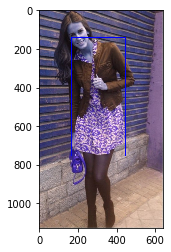

In [23]:
csv_file = 'dress_patterns.csv' # csv file contains urls
%matplotlib inline
def showSimilarImage(img_path,n_sim = 4):
 
    result_category = predictImage(img_path)

    print(f"query Image category is {result_category}")
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    plt.imshow(img) # to Display query image 

    df =pd.read_csv(csv_file)
    df1 =df[ df['category'].str.contains(result_category).to_list() ]
    imgs = df1['image_url'].sample(n_sim).to_list()
    # To display all the similar images
    for i in imgs:
        
        name = i.rsplit('/')[-1].split('.')[0]+'.png' 
        loc = "dataset/"
        imgName = loc + name
        # print(filename)
        img = cv2.imread(imgName, cv2.IMREAD_UNCHANGED)
        plt.imshow(img)
        
showSimilarImage('dataset/00073f06539e4dd7b81f6009eedbcae3.png')
     
        
#cv2.destroyAllWindows()

